In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import DistanceMetric
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Praca inżynierska/Parkinsson disease.csv'
df = pd.read_csv(file_path)
X = df.drop(['name','status'], axis=1)
y = df['status']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X,y)
print("Rozmiar przed nadprobkowaniem",X.shape)
print("Rozmiar po nadpróbkowaniu",X_resampled.shape)

Rozmiar przed nadprobkowaniem (195, 22)
Rozmiar po nadpróbkowaniu (294, 22)


In [ ]:
df1=pd.concat([X_resampled,y_resampled],axis=1)
df1.shape

(294, 23)

In [ ]:
sc_resampled = StandardScaler()
sc_resampled.fit(X_resampled)
X_resampled = sc_resampled.transform(X_resampled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

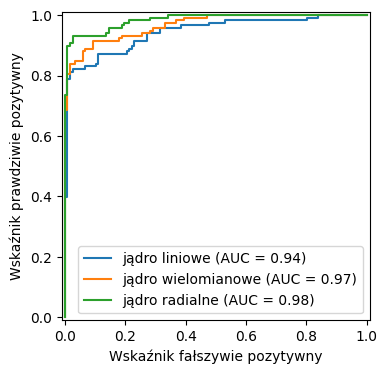

In [ ]:
# na zbiorze treningowym
fig, ax = plt.subplots(figsize=(4,4))


svc1 = SVC(kernel='linear')  #klasyfikator
svc1.fit(X_train, y_train)  # fit na zbiorze TRENINGOWYM
RocCurveDisplay.from_estimator(svc1, X_train, y_train, ax=ax, name='jądro liniowe') #jądro liniowe


svc2 = SVC(kernel='poly')
svc2.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc2, X_train, y_train, ax=ax, name='jądro wielomianowe') #jądro wielomianowe

svc3 = SVC(kernel='rbf')
svc3.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc3, X_train, y_train, ax=ax, name='jądro radialne') #jądro radialne

plt.xlabel("Wskaźnik fałszywie pozytywny")
plt.ylabel("Wskaźnik prawdziwie pozytywny")

plt.show()

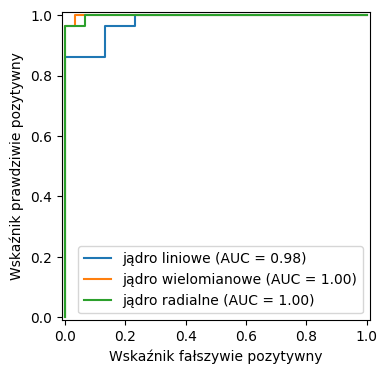

In [ ]:
# na zbiorze testowym
fig, ax = plt.subplots(figsize=(4,4))

svc1 = SVC(kernel='linear')
svc1.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc1, X_test, y_test, ax=ax, name='jądro liniowe')


svc2 = SVC(kernel='poly')
svc2.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc2, X_test, y_test, ax=ax, name='jądro wielomianowe')

svc3 = SVC(kernel='rbf')
svc3.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc3, X_test, y_test, ax=ax, name='jądro radialne')

plt.xlabel("Wskaźnik fałszywie pozytywny")
plt.ylabel("Wskaźnik prawdziwie pozytywny")

plt.show()

In [ ]:
# Wyszukiwane w pętli

param_grid = {'C':[i for i in range(1,20)], 'gamma': [i for i in range(1,22)]}
clf = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=param_grid, cv=5, verbose=3, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best:', clf.best_params_)

Fitting 5 folds for each of 399 candidates, totalling 1995 fits
[CV 1/5] END ......................C=1, gamma=1;, score=0.957 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=0.936 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=0.872 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=0.936 total time=   0.0s
[CV 1/5] END ......................C=1, gamma=2;, score=0.936 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=2;, score=0.851 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=2;, score=0.957 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=2;, score=0.894 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=2;, score=0.936 total time=   0.0s
[CV 1/5] END ......................C=1, gamma=3;, score=0.915 total time=   0.0s
[CV 2/5] END ......................C=1, gamma

In [ ]:
svc = SVC(kernel='rbf', C=2, gamma=1) # C margines separacji , gamma dopasowanie modelu do zbioru im wyzszy tym lepszy,
svc.fit(X_train, y_train)

print('Accuracy (train):', accuracy_score(y_train, svc.predict(X_train)))
print('Classification report (test)')
print(classification_report(y_test, svc.predict(X_test)))

Accuracy (train): 1.0
Classification report (test)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [ ]:
print('Macierz pomyłek')
print(confusion_matrix(y_test, svc.predict(X_test)))


Macierz pomyłek
[[30  0]
 [ 0 29]]
